In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('E:/Graduate Study Material/ML/Assignments/hw3')
import mltools as ml
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline
from logisticClassify2 import *

# P1: Logistic Regression
First, we'll load the data, and split it into two data sets.

In [2]:
path = "E:/Graduate Study Material/ML/Assignments/hw3/data/iris.txt"
iris = np.genfromtxt(path , delimiter = None)   # load the text file
X, Y = iris[:,0:2], iris[:,-1]   # get first two features & target
X,Y = ml.shuffleData(X,Y)   # reorder randomly (important later)
X,_ = ml.rescale(X)   # works much better on rescaled data

XA, YA = X[Y<2,:], Y[Y<2]   # get class 0 vs 1
XB, YB = X[Y>0,:], Y[Y>0]   # get class 1 vs 2

## 1.1

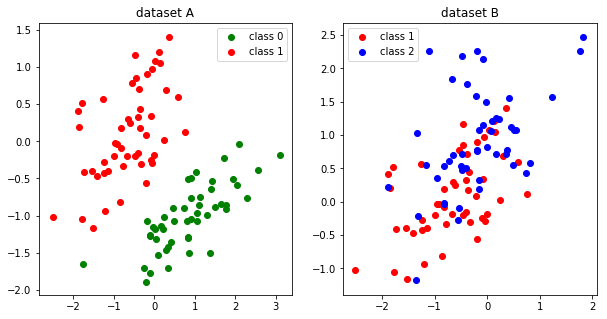

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
maskA = YA == 0
maskB = YB == 1
ax[0].scatter(XA[maskA,0],XA[maskA,1],color='g',label='class 0')
ax[0].scatter(XA[~maskA,0],XA[~maskA,1],color='r',label='class 1')
ax[0].legend()
ax[0].set_title('dataset A')
ax[1].scatter(XB[maskB,0],XB[maskB,1],color='r',label='class 1')
ax[1].scatter(XB[~maskB,0],XB[~maskB,1],color='b',label='class 2')
ax[1].legend()
ax[1].set_title('dataset B')
plt.show()

From the plots of two data set, we know that class 0 and class 1 are linearly separable while class 1 and class 2 are not. 

## 1.2

The lines of code I added to the function "plotBoundary" is:

x2b = (-self.theta[0]-self.theta[1]*x1b)/self.theta[2]

Then we can plot the decision boundary of A data and B data.

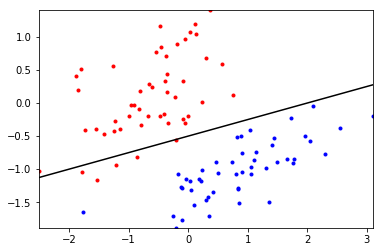

In [4]:
learner = logisticClassify2(); # create "blank" learner
learner.classes = np.unique(YA) # define class labels
wts = np.array([0.5, -0.25, 1.])
learner.theta = wts; # set the learner's parameters
learner.plotBoundary(XA, YA)
plt.show()

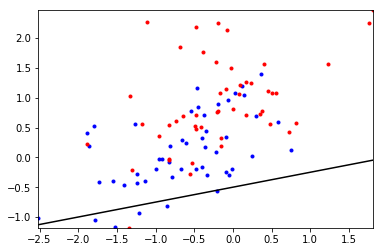

In [5]:
learner.classes = np.unique(YB)
learner.plotBoundary(XB, YB)
plt.show()

## 1.3

The definition of the function "predict" is as below.

In [6]:
#def predict(self, X):
#    """ Return the predictied class of each data point in X"""
#    ## TODO: compute linear response r[i] = theta0 + theta1 X[i,1] + 
#    ## theta2 X[i,2] + ... for each i
#    r = np.zeros(X.shape[0])
#    Yhat = np.zeros(X.shape[0])
#    for i in range(X.shape[0]):
#        r[i] = self.theta[0] + self.theta[1]*X[i,0]+self.theta[2]*X[i,1]
#
#    ## TODO: if z[i] > 0, predict class 1:  Yhat[i] = self.classes[1]
#        if r[i] > 0:
#            Yhat[i] = self.classes[1]
#    ## else predict class 0:  Yhat[i] = self.classes[0]
#        else:
#            Yhat[i] = self.classes[0]
#    return Yhat

In [7]:
# create learner objects for dataset A
learnerA = logisticClassify2(); 
learnerA.classes = np.unique(YA) 
learnerA.theta = wts; 
print('error rate of dataset A:',learnerA.err(XA,YA))

# create learner objects for dataset B
learnerB = logisticClassify2(); 
learnerB.classes = np.unique(YB) 
learnerB.theta = wts; 
print('error rate of dataset B:',learnerB.err(XB,YB))

error rate of dataset A: 0.050505050505050504
error rate of dataset B: 0.46464646464646464


## 1.4

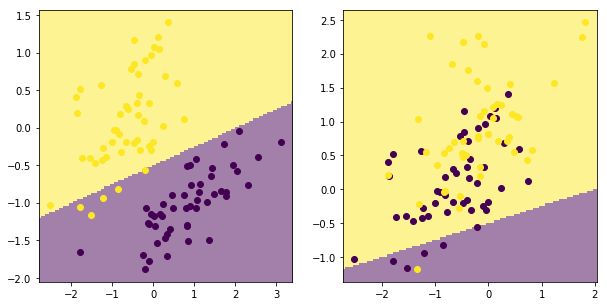

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ml.plotClassify2D(learnerA, XA, YA, axis=ax[0])
ml.plotClassify2D(learnerB, XB, YB, axis=ax[1])
plt.show()

The plots above shows that the resulting decision boundary matches the one I computed analytically.

## 1.5

Since $\sigma(r)=\frac{1}{1+e^{-r}}$ , $\frac{\partial \sigma(r)}{\partial r}=\sigma(r)(1-\sigma(r))$

Since $J_j(\theta)=-y^{(j)}log \sigma(x^{(j)}\theta^T)-(1-y^{(j)})log(1-\sigma(x^{(j)}\theta^T))$

Then $\frac{\partial J_j(\theta)}{\partial \theta}=-y^{(j)}[1-\sigma(x^{(j)}\theta^T)]x^{(j)}+(1-y^{(j)})\sigma(x^{(j)}\theta^T)x^{(j)}=x^{(j)}[\sigma(x^{(j)}\theta^T)-y^{(j)}]$ , So 

$\frac{\partial}{\partial \theta_0}J_j=\sigma(x^{(j)}\theta^T)-y^{(j)}$

$\frac{\partial}{\partial \theta_1}J_j=x_1[\sigma(x^{(j)}\theta^T)-y^{(j)}]$

$\frac{\partial}{\partial \theta_2}J_j=x_2[\sigma(x^{(j)}\theta^T)-y^{(j)}]$

## 1.6

The definition of function "train" is as follow.

In [9]:
#def train(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=True):
#    """ Train the logistic regression using stochastic gradient descent """
#    M,N = X.shape;                 # initialize the model if necessary:
#    self.classes = np.unique(Y);   # Y may have two classes, any values
#    XX = np.hstack((np.ones((M,1)),X)) 
#    # XX is X, but with an extra column of ones
#    YY = ml.toIndex(Y,self.classes);   
#    # YY is Y, but with canonical values 0 or 1
#    if len(self.theta)!=N+1: self.theta=np.random.rand(N+1);
#
#    # define sigmoid function
#    def sigmoid(r):
#         return 1/(1+np.exp(-r))
#    # init loop variables:
#    epoch=0; done=False; Jnll=[np.inf]; J01=[np.inf]; 
#    while not done:
#        stepsize, epoch = initStep*2.0/(2.0+epoch), epoch+1; 
#        # update stepsize
#        # Do an SGD pass through the entire data set:
#        for i in np.random.permutation(M):
#            # TODO: compute linear response r(x)
#            ri = np.dot(self.theta,XX[i,:])
#            # TODO: compute gradient of NLL loss
#            gradi = (sigmoid(ri)-YY[i])*XX[i,:];
#            self.theta -= stepsize * gradi;  # take a gradient step
#
#        J01.append(self.err(X,Y))  # evaluate the current error rate
#
#        ## TODO: compute surrogate loss (logistic negative log-likelihood)
#        ##  Jsur = sum_i [ (log si) if yi==1 else (log(1-si)) ]
#        Jsur = [];
#        for i in np.random.permutation(M):
#            Jsur.append(-np.log(sigmoid(np.dot(self.theta, XX[i,:]))) \
#            if YY[i]==1 else -np.log(1-sigmoid(np.dot(self.theta, XX[i,:]))))
#
#        Jnll.append(np.mean(Jsur)) # TODO evaluate the current NLL loss
#
#        # TODO check stopping criteria: exit if exceeded # of epochs (>stopEpochs)
#        # or if Jnll not changing between epochs (<stopTol)
#        done = (epoch > stopEpochs) or np.abs(Jnll[-2] - Jnll[-1]) < stopTol
#        
#    # plot losses
#    if plot==True:
#        print('Reached convergance after %d iterations => Final surrogate loss\
#            is: %.3f, error rate is: %.3f' % (epoch, Jnll[-1], J01[-1]))
#        
#        plt.figure(1); plt.plot(Jnll,'b-',label='surrogate loss'); 
#        plt.plot(J01,'r-',label='error rate ');plt.xlabel("epoch"); 
#        plt.title("Convergence of Surrogate Loss and Error Rate"); 
#        plt.legend(); plt.draw();
#    
#        # & predictor if 2D
#        if N==2: 
#            plt.figure(2); self.plotBoundary(X,Y); 
#            plt.title("Final Converged Classifier"); plt.draw(); 
#            plt.pause(.01);  # let OS draw the plot
#        
#    return (self.theta, epoch, Jnll[-1], J01[-1])

## 1.7

For both dataset A and dataset B, It's obvious that when stopTol becomes small or stopEpochs becomes large, the final surrogate loss will become small. But to avoid overfitting, I choose stopEpochs=500, stopTol=1e-4. Then I tried initStep to be 0.001, 0.005, 0.1, 0.5 which are from small to large, it shows when initStep=0.5, the final surrogate loss and the error rate both are the lowest. So I choose initStep=0.5.

The training result of dataset A is as below.

Reached convergance after 48 iterations => 
Final surrogate loss is: 0.029, error rate is: 0.000


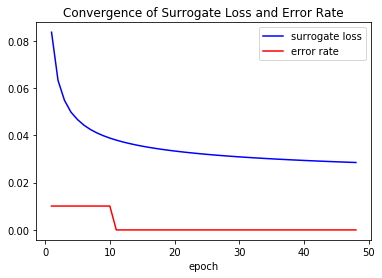

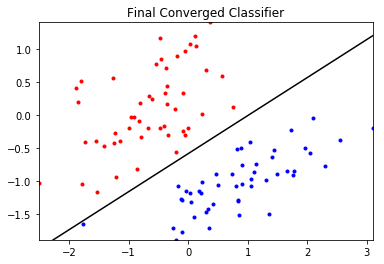

(array([ 3.51209268, -3.45764397,  6.01069038]), 48, 0.028515694903011674, 0.0)

In [10]:
learnerA.train(XA,YA,initStep=0.5,stopTol=1e-4,stopEpochs=500)

Reached convergance after 14 iterations => 
Final surrogate loss is: 0.544, error rate is: 0.242


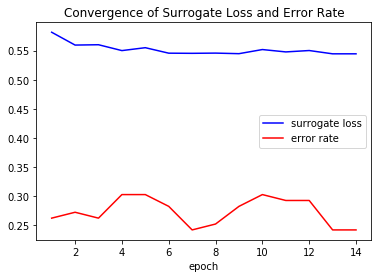

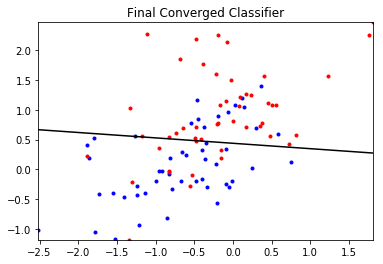

(array([-0.75075015,  0.15528256,  1.71808938]),
 14,
 0.5444902526571954,
 0.24242424242424243)

In [11]:
learnerB.train(XB,YB,initStep=0.5,stopTol=1e-4,stopEpochs=500)

## 1.8

After adding the L2 regularization term, $J_j(\theta)$ will change.

$J_j(\theta)=-y^{(j)}log \sigma(x^{(j)}\theta^T)-(1-y^{(j)})log(1-\sigma(x^{(j)}\theta^T))+\alpha\sum_i \theta_i^2$ , So

$\frac{\partial}{\partial \theta_0}J_j=\sigma(x^{(j)}\theta^T)-y^{(j)}+2\alpha\theta_0$

$\frac{\partial}{\partial \theta_1}J_j=x_1[\sigma(x^{(j)}\theta^T)-y^{(j)}]+2\alpha\theta_1$

$\frac{\partial}{\partial \theta_2}J_j=x_2[\sigma(x^{(j)}\theta^T)-y^{(j)}]+2\alpha\theta_2$

So the function "train" can be updated as follow.

In [12]:
#def train(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, \
#          plot=True, alpha=0):
#    """ 
#       Train the logistic regression using stochastic gradient descent 
#    """
#    M,N = X.shape;                 # initialize the model if necessary:
#    self.classes = np.unique(Y);   # Y may have two classes, any values
#    XX = np.hstack((np.ones((M,1)),X))
#    # XX is X, but with an extra column of ones
#    YY = ml.toIndex(Y,self.classes);
#    # YY is Y, but with canonical values 0 or 1
#    if len(self.theta)!=N+1: self.theta=np.random.rand(N+1);
#    
#    # define sigmoid function
#    def sigmoid(r):
#         return 1/(1+np.exp(-r))
#    # init loop variables:
#    epoch=0; done=False; Jnll=[np.inf]; J01=[np.inf]; 
#    while not done:
#        stepsize, epoch = initStep*2.0/(2.0+epoch), epoch+1; 
#        # update stepsize
#        # Do an SGD pass through the entire data set:
#        for i in np.random.permutation(M):
#            # TODO: compute linear response r(x)
#            ri = np.dot(self.theta,XX[i,:])
#            # TODO: compute gradient of NLL loss
#            gradi = (sigmoid(ri)-YY[i])*XX[i,:]+2*alpha*self.theta;
#            self.theta -= stepsize * gradi;  # take a gradient step
#
#        J01.append(self.err(X,Y))  # evaluate the current error rate
#
#        ## TODO: compute surrogate loss (logistic negative log-likelihood)
#        ##  Jsur = sum_i [ (log si) if yi==1 else (log(1-si)) ]
#        Jsur = [];
#        for i in np.random.permutation(M):
#            Jsur.append(-np.log(sigmoid(np.dot(self.theta, XX[i,:]))) \
#            if YY[i]==1 else -np.log(1-sigmoid(np.dot(self.theta, XX[i,:]))))
#
#        # TODO evaluate the current NLL loss
#        Jnll.append(np.mean(Jsur)+alpha*np.dot(self.theta,self.theta)) 
#
#        # TODO check stopping criteria: exit if exceeded # of epochs (>stopEpochs)
#        # or if Jnll not changing between epochs (<stopTol)
#        done = (epoch > stopEpochs) or np.abs(Jnll[-2] - Jnll[-1]) < stopTol
#                
#    # plot losses
#    if plot==True:
#        print('Reached convergance after %d iterations => Final surrogate loss\
#              is: %.3f, error rate is: %.3f' % (epoch, Jnll[-1], J01[-1]))
#        
#        plt.figure(1); plt.plot(Jnll,'b-',label='surrogate loss'); 
#        plt.plot(J01,'r-',label='error rate ');plt.xlabel("epoch"); 
#        plt.title("Convergence of Surrogate Loss and Error Rate"); 
#        plt.legend(); plt.draw();
#    
#        # & predictor if 2D
#        if N==2: 
#            plt.figure(2); self.plotBoundary(X,Y); 
#            plt.title("Final Converged Classifier"); plt.draw(); 
#            plt.pause(.01);  # let OS draw the plot
#        
#    return (self.theta, epoch, Jnll[-1], J01[-1])

### 1.8.1

We try alpha=0.001 firstly for dataset A.

Reached convergance after 13 iterations => 
Final surrogate loss is: 0.082, error rate is: 0.010


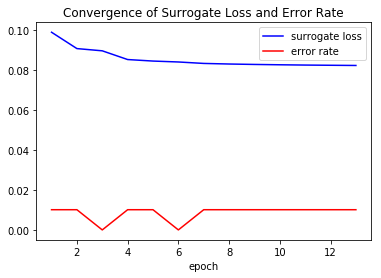

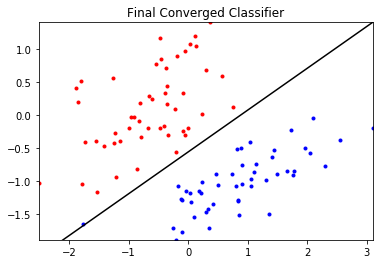

(array([ 2.41533015, -2.73575949,  4.32488351]),
 13,
 0.08220959409172693,
 0.010101010101010102)

In [13]:
learnerA.train(XA,YA,initStep=0.5,stopEpochs=500, alpha=0.001)

Then we try a list of different alpha to see how different the resulting parameters are.

In [14]:
# create a list of alpha
alphaList=[0.001,0.01,0.1,1.0]
print('For dataset A: theta, iteration, final surrogate loss, final error rate')

# try different alpha
learnerA1 = logisticClassify2(); 
learnerA1.classes = np.unique(YA) 
learnerA1.theta = wts; 
print(learnerA1.train(XA,YA,initStep=0.5,stopEpochs=500, \
                      alpha=alphaList[0],plot=False))

learnerA2 = logisticClassify2(); 
learnerA2.classes = np.unique(YA) 
learnerA2.theta = wts; 
print(learnerA2.train(XA,YA,initStep=0.5,stopEpochs=500, \
                      alpha=alphaList[1],plot=False))

learnerA3 = logisticClassify2(); 
learnerA3.classes = np.unique(YA) 
learnerA3.theta = wts; 
print(learnerA3.train(XA,YA,initStep=0.5,stopEpochs=500, \
                      alpha=alphaList[2],plot=False))

learnerA4 = logisticClassify2(); 
learnerA4.classes = np.unique(YA) 
learnerA4.theta = wts; 
print(learnerA4.train(XA,YA,initStep=0.5,stopEpochs=500, \
                      alpha=alphaList[3],plot=False))

For dataset A: theta, iteration, final surrogate loss, final error rate
(array([ 2.60347338, -2.88659861,  4.56954779]), 4, 0.0815198388498769, 0.010101010101010102)
(array([ 0.99842266, -1.76330149,  2.10502106]), 5, 0.21779604306185063, 0.020202020202020204)
(array([ 0.19414238, -0.78155847,  0.71624925]), 24, 0.4612159110189043, 0.030303030303030304)
(array([-0.00456504, -0.17041576,  0.11983219]), 73, 0.6463499746684326, 0.08080808080808081)


The result shows that when alpha increase, theta will decrease, final surrogate loss and final error rate will increase. This is because adding regulation can avoid overfiting, bigger alpha means we are more focus on smaller theta than smaller error rate. So final surrogate loss and final error rate will increase.

### 1.8.2

We try dataset B secondly.

Reached convergance after 14 iterations => 
Final surrogate loss is: 0.548, error rate is: 0.232


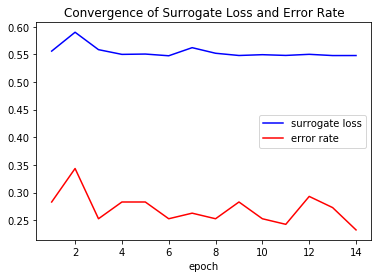

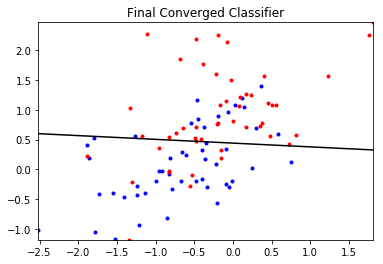

(array([-0.70093344,  0.10038292,  1.59421348]),
 14,
 0.5477850383528556,
 0.23232323232323232)

In [15]:
learnerB.train(XB,YB,initStep=0.5,stopEpochs=500, alpha=0.001)

In [16]:
print('For dataset B: theta, iteration, final surrogate loss, final error rate')

# try different alpha
learnerB1 = logisticClassify2(); 
learnerB1.classes = np.unique(YB) 
learnerB1.theta = wts; 
print(learnerB1.train(XB,YB,initStep=0.5,stopEpochs=500, \
                      alpha=alphaList[0],plot=False))

learnerB2 = logisticClassify2(); 
learnerB2.classes = np.unique(YB) 
learnerB2.theta = wts; 
print(learnerB2.train(XB,YB,initStep=0.5,stopEpochs=500, \
                      alpha=alphaList[1],plot=False))

learnerB3 = logisticClassify2(); 
learnerB3.classes = np.unique(YB) 
learnerB3.theta = wts; 
print(learnerB3.train(XB,YB,initStep=0.5,stopEpochs=500, \
                      alpha=alphaList[2],plot=False))

learnerB4 = logisticClassify2(); 
learnerB4.classes = np.unique(YB) 
learnerB4.theta = wts; 
print(learnerB4.train(XB,YB,initStep=0.5,stopEpochs=500, \
                      alpha=alphaList[3],plot=False))

For dataset B: theta, iteration, final surrogate loss, final error rate
(array([-0.73719383,  0.2585461 ,  1.59318531]), 11, 0.5478517822045476, 0.2727272727272727)
(array([-0.51057323,  0.34068691,  1.18108089]), 15, 0.5683448552733013, 0.2828282828282828)
(array([-0.07788893,  0.26699438,  0.5173274 ]), 31, 0.6291243568338846, 0.26262626262626265)
(array([-0.04003227,  0.0842866 ,  0.05967229]), 25, 0.6845277354833121, 0.29292929292929293)


The result has the same trend and reason with the result of dataset A.

# P2: Shattering and VC Dimension

![VC1](VC1.jpg)
![VC2](VC2.jpg)
![VC3](VC3.jpg)

# Statement of Collaboration